#**Autores:** Jhon Jairo Castillo - Juan Camilo Tobar

Para este ultimo codigo se trabajara un dataset con archivos .wav, este dataset esta compuesto por 90 muestras de audio de 5 diferentes instrumentos musicales (bateria, violín, guitarra, piano, trompeta) los cuales se encuentran divididos en 125 datos de entrenamiento (25 por instrumento) y 25 de validacion (5 por instrumento), cabe resaltar que para la creacion de este dataset se utilizo la herramienta edge impulse.

Con el fin de clasificar los sonidos respectivos de cada instrumento a continuacion se proponen 2 modelos basados en  convolucion 2D entrenado a partir del los espectrogramas generados para cada sonido.

Para ello el primer paso es enlazar la fuente del dataset (google drive) e importar las librerias necesarias.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, Flatten, MaxPooling1D, MaxPooling2D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

from IPython import display

A continuacion definimos una funcion para cargar los archivos wav para un solo canal

In [3]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
   # from 44100Hz to 16000hz - amplitude of the audio signal
   
    return wav

Ahora cargamos los datos desde el dataset usando la funcion creada anteriormente y guardando los sonidos en un arreglo waves, de igual manera podemos definir nuestro vector y_train a partir de los nombres de cada archivo, donde para los sonidos de bateria la etiqueta es 0, para trompeta 1, para violin el 2, para guitarra el 3, y para el piano 4.

In [4]:
from posixpath import join
import wave, os, glob
waves = [] #arreglo de sonidos
y_train = [] 
path = '/content/gdrive/MyDrive/Datos_Secuenciales/Instrumentos/training'
for filename in glob.glob(os.path.join(path, '*.wav')):
    wave = load_wav_16k_mono(filename)
    waves.append(wave)

    nameFile= os.path.basename(filename)
    if "bateria" in nameFile:
      label = 0
      y_train.append(label)

    elif "trompeta" in nameFile:
      label = 1
      y_train.append(label)

    elif "violin" in nameFile:
      label = 2
      y_train.append(label)

    elif "guitarra" in nameFile:
      label = 3
      y_train.append(label)

    elif "piano" in nameFile:
      label = 4
      y_train.append(label)

    else:
      y_train.append(NaN)


In [5]:
y_train

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1]

Codificamos la salida con one hot encoding para su debido entrenamiento

In [6]:
Ytrain= to_categorical(y_train)
print(Ytrain)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0.

Muestra la ultima señal guardada

tf.Tensor(
[-0.09832764 -0.02133179 -0.05883789 ...  0.04708862  0.00213623
  0.00253296], shape=(48000,), dtype=float32)


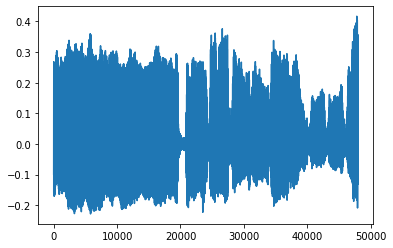

In [7]:

print(wave)
plt.plot(wave)
plt.show()

A continuacion se realiza una funcion que permita extraer las componentes de frecuencia de la señal a traves de un espectograma

In [8]:
def preprocess(wave): 
    wav = wave[:32000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
   # wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

Probamos la funcion anterior a partir de una de las señales del vector waves al azar, imprimiendo el tamaño del espectograma, el tamaño de la señal, y la clase a la que corresponde el sonido

In [9]:
n=12
espectrograma= preprocess(waves[n])
print('Waveform shape:', waves[n].shape)
print('Spectrogram shape:', espectrograma.shape)
print('Audio playback')
print(y_train[n])
display.display(display.Audio(waves[n], rate=16000))

Waveform shape: (48000,)
Spectrogram shape: (249, 129)
Audio playback
0


la siguiente funcion permite hacer un grafico del espectrograma extraido de una señal

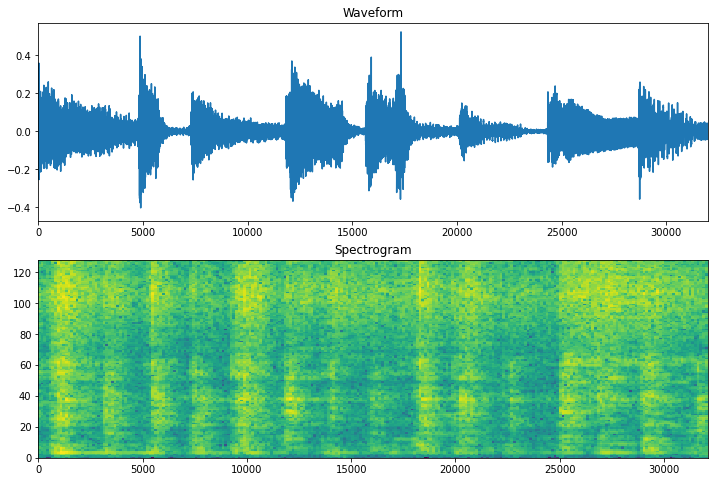

In [10]:
def plot_spectrogram(espectrograma, ax):
  # Convert to frequencies to log scale and transpose so that the time is
  # represented in the x-axis (columns).
  log_spec = np.log(espectrograma.T)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(espectrograma), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waves[2].shape[0])
axes[0].plot(timescale, waves[2].numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 32000])
plot_spectrogram(espectrograma.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

Con las funciones de espectrograma realizadas se debe crear las entradas para nuestro modelo, para ello se crea una matriz X_train donde se guarden los valores de los espectrogramas de cada señal del dataset.

In [11]:
X_train = []

for wave in waves:
  spectro= preprocess(wave)
  X_train.append(spectro)

X_train=np.array(X_train) # se debe convertir a array para poder ingresarlo al modelo
print(spectro.shape)

(249, 129)


In [12]:
X_train[0]

array([[0.15200974, 0.26959857, 1.0550522 , ..., 0.14445075, 0.29335   ,
        0.20012696],
       [0.18481132, 0.26371387, 2.2069893 , ..., 0.5622484 , 0.39143384,
        0.09555444],
       [0.1813575 , 0.1995098 , 1.6846769 , ..., 0.21953005, 0.37632853,
        0.04377055],
       ...,
       [0.00863141, 0.01262466, 0.05177366, ..., 0.01323951, 0.01665861,
        0.00314186],
       [0.00273988, 0.0325844 , 0.09363924, ..., 0.00984519, 0.02214318,
        0.00662331],
       [0.00915066, 0.04344485, 0.07488204, ..., 0.00906735, 0.01661498,
        0.00510963]], dtype=float32)

In [13]:
Ytrain[0]

array([0., 0., 0., 1., 0.], dtype=float32)

## PRIMER MODELO

Para el primer modelo se creara una arquitectura basada en convolucion 2D, esto debido a que los valores de espectrograma son en 2 dimensiones, este modelo contara con 1 capa convolucional, un max pooling una capa de flatten y 2 capas densas con una salida de 5 neuronas con activacion softmax para las respectivas 5 clases

In [14]:


import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK

inputs = LK.Input(shape=(249,129,1))
conv1 = LK.Conv2D(24, (5,5),padding='valid',activation='relu')(inputs)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
flat = LK.Flatten()(pool1)
FC1 = LK.Dense(100,activation='relu')(flat)
outputs = LK.Dense(5,activation='softmax')(FC1)
modelo = MK.Model(inputs, outputs)


CALCULO DE PARAMETROS

CAPA 1: CONV2D  con 29 filtros de 5x5

capa 1= (5x5x1)24+24=624

----------



CAPA 2 Y 3= MAX POOLING Y FLATTEN =0

----------
CAPA 4: capa densa con 100 neuronas donde le entran 181536 datos desde el flatten

Capa 4= 181536*100+100=18153700

------------

CAPA 5: capa de salida con 5 neuronas

capa 5= 100*5+5=505

Total parametros=624+18153700+505=18154829







Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 249, 129, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 245, 125, 24)      624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 62, 24)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 181536)            0         
                                                                 
 dense (Dense)               (None, 100)               18153700  
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                             

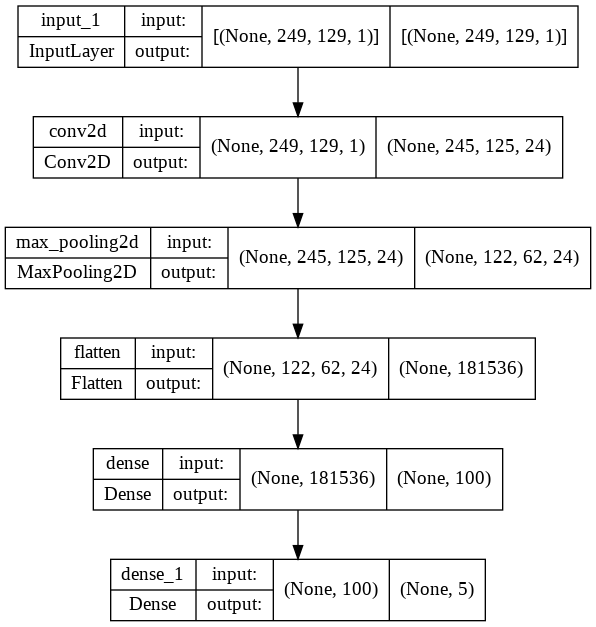

In [15]:
modelo.summary()
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

Realizamos el entrenamiento del modelo

In [16]:
modelo.compile(optimizer="adam",loss="categorical_crossentropy" ,metrics=['accuracy'])

In [17]:
history=modelo.fit (X_train, Ytrain, epochs=10, verbose = 1)

Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 5.4662 - accuracy: 0.3600
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 1.6390 - accuracy: 0.7600
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 0.4602 - accuracy: 0.8480
Epoch 4/10
4/4 [==============================] - 4s 975ms/step - loss: 0.2760 - accuracy: 0.8880
Epoch 5/10
4/4 [==============================] - 4s 928ms/step - loss: 0.0835 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 4s 944ms/step - loss: 0.0539 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 4s 918ms/step - loss: 0.0351 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 4s 1s/step - loss: 0.0296 - accuracy: 0.9920
Epoch 9/10
4/4 [==============================] - 4s 951ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 3s 604ms/step - loss: 0.0125 - accuracy: 1.0000


4/4 [==============================] - 1s 144ms/step - loss: 0.0098 - accuracy: 1.0000


[0.009810147807002068, 1.0]

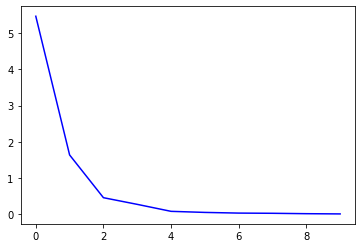

In [18]:
#graficar la perdida  a traves de las epocas
plt.plot(history.history["loss"],'b')
modelo.evaluate(np.array(X_train), Ytrain)

Realizamos la matriz de confusion para los datos de entrenamiento

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[25  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


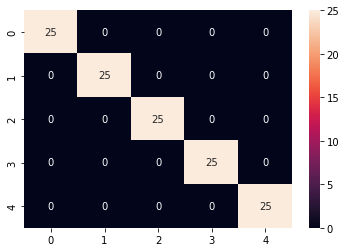

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(np.array(X_train))

y_test_class = np.argmax(Ytrain,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

CARGAR DATOS DE TEST

Para los datos de test se realiza el mismo procedimiento de lectura que se realizo para los datos de entrenamiento con el fin de hallar un vector de waves que sean convertidos a espectrograma y hallar los valores categoricos para y_test

In [20]:
waves_test = []
y_test = []
path = '/content/gdrive/MyDrive/Datos_Secuenciales/Instrumentos/testing'
for filename in glob.glob(os.path.join(path, '*.wav')):
    wave = load_wav_16k_mono(filename)
    waves_test.append(wave)

    nameFile= os.path.basename(filename)
    if "bateria" in nameFile:
      label = 0
      y_test.append(label)

    elif "trompeta" in nameFile:
      label = 1
      y_test.append(label)

    elif "violin" in nameFile:
      label = 2
      y_test.append(label)

    elif "guitarra" in nameFile:
      label = 3
      y_test.append(label)

    elif "piano" in nameFile:
      label = 4
      y_test.append(label)

    else:
      y_test.append(0)


In [21]:
Ytest= to_categorical(y_test)
print(Ytest)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [22]:
X_test = []

for wave in waves_test:
  spectro= preprocess(wave)
  X_test.append(spectro)

X_test=np.array(X_test)
len(X_test)

25

Realizamos la prediccion sobre los datos de test

In [23]:
predict_test=modelo.predict(X_test)
print (predict_test)

[[2.56311500e-06 1.03152473e-03 9.98962283e-01 3.27827092e-06
  2.19067502e-07]
 [4.78049432e-24 2.69957823e-11 1.00000000e+00 3.76973824e-26
  4.02464528e-23]
 [3.22578043e-18 4.42175946e-07 9.99999523e-01 1.88654123e-17
  5.09896308e-19]
 [2.22064944e-08 9.90047574e-01 5.18357381e-03 7.22993207e-07
  4.76810103e-03]
 [9.48187429e-03 4.45007056e-01 8.46294910e-02 5.58755696e-02
  4.05006021e-01]
 [2.89507921e-06 7.46735573e-01 2.53258169e-01 3.28545138e-06
  4.69290429e-09]
 [9.99999762e-01 1.92947613e-09 5.48892025e-08 2.21951964e-07
  8.96641812e-20]
 [1.07382304e-10 9.99809682e-01 4.31293245e-07 3.65679369e-07
  1.89519662e-04]
 [1.23404211e-18 1.00000000e+00 1.39327300e-11 2.52448058e-18
  6.01110497e-17]
 [4.28645602e-16 9.92105603e-01 6.12491976e-06 9.58060888e-13
  7.88829289e-03]
 [1.28191945e-12 1.07550898e-06 5.13778398e-09 2.68541444e-02
  9.73144770e-01]
 [2.13101771e-06 1.19391652e-05 8.58810267e-07 6.24406210e-04
  9.99360621e-01]
 [2.30588952e-19 8.29190671e-01 1.823164

Realizamos la matriz de confusion para los datos de test para el modelo 1

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.57      0.80      0.67         5
           2       0.75      0.60      0.67         5
           3       1.00      0.40      0.57         5
           4       1.00      0.80      0.89         5

    accuracy                           0.72        25
   macro avg       0.79      0.72      0.71        25
weighted avg       0.79      0.72      0.71        25

[[5 0 0 0 0]
 [1 4 0 0 0]
 [0 2 3 0 0]
 [2 0 1 2 0]
 [0 1 0 0 4]]


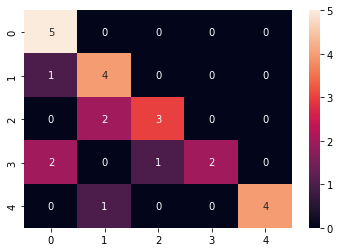

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(np.array(X_test))

y_test_class = np.argmax(Ytest,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [25]:
modelo.evaluate(np.array(X_test), Ytest)

1/1 [==============================] - 0s 130ms/step - loss: 1.5707 - accuracy: 0.7200


[1.5707098245620728, 0.7200000286102295]

Podemos observar que el modelo tiene un accuracy del 72% para el modelo 1 donde obtuvo errores de clasificacion en todas las clases

##MODELO 2

Para el modelo 2 se ha propuesto una arquitectura con mas capas, este modelo esta compuesto por 2 capas de convolucion 2D cada una con su debido max pooling una cpa de flatten y 2 capas densas con 200 y 100 neuronas y una salida de 5 neuronas con activacion softmax para realizar la clasificacion

In [26]:
# modelo 2

inputs = LK.Input(shape=(249,129,1))
conv1 = LK.Conv2D(24, (5,5),padding='valid',activation='relu')(inputs)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)

conv2 = LK.Conv2D(12, (5,5),padding='valid',activation='relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)

flat = LK.Flatten()(pool2)
FC1 = LK.Dense(200,activation='relu')(flat)
FC2 = LK.Dense(100,activation='relu')(FC1)
outputs = LK.Dense(5,activation='softmax')(FC2)
modelo2 = MK.Model(inputs, outputs)

CALCULO DE PARAMETROS

CAPA 1: CONV2D  con 24 filtros de 5x5

capa 1= (5x5x1)24+24=624

----------


CAPA 2 = Max pooling =0

----------
CAPA 3: CONV2D  con 12 filtros de 5x5

capa 3= (5*5*24)*12+12=7212

--------

CAPA 4 y 5= Max Pooling y flatten=0

------
CAPA 6: capa densa con 200 neuronas donde le entran 20532 datos desde el flatten

Capa 6= 20532*200+200=4106600

------------
CAPA 7: capa densa con 100 neuronas donde entran 100 datos de la capa anterior
Capa 7= 200*100+100=20100

----------

CAPA 8: capa de salida con 5 neuronas

capa 8= 100*5+5=505

----------

Total parametros=624+7212+4106600+20100+505=4135041


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 249, 129, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 125, 24)      624       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 62, 24)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 58, 12)       7212      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 29, 12)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20532)             0   

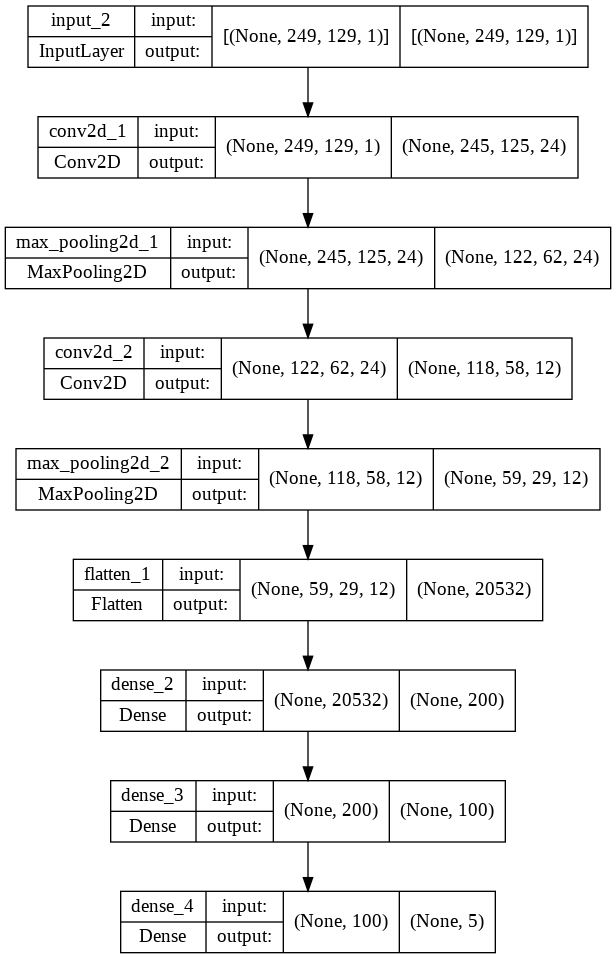

In [27]:
modelo2.summary()
keras.utils.plot_model(modelo2, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [28]:

modelo2.compile(optimizer="adam",loss="categorical_crossentropy" ,metrics=['accuracy'])

In [29]:
history2=modelo2.fit (X_train, Ytrain, epochs=10, verbose = 1)

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 1.5453 - accuracy: 0.3120
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 0.7894 - accuracy: 0.8080
Epoch 3/10
4/4 [==============================] - 4s 1s/step - loss: 0.3475 - accuracy: 0.8880
Epoch 4/10
4/4 [==============================] - 4s 1s/step - loss: 0.1548 - accuracy: 0.9280
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 0.1612 - accuracy: 0.9760
Epoch 6/10
4/4 [==============================] - 4s 1s/step - loss: 0.0727 - accuracy: 0.9680
Epoch 7/10
4/4 [==============================] - 4s 993ms/step - loss: 0.0608 - accuracy: 0.9840
Epoch 8/10
4/4 [==============================] - 4s 1s/step - loss: 0.0779 - accuracy: 0.9840
Epoch 9/10
4/4 [==============================] - 4s 1s/step - loss: 0.0213 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 4s 1s/step - loss: 0.0151 - accuracy: 1.0000


4/4 [==============================] - 1s 239ms/step - loss: 0.0114 - accuracy: 1.0000


[0.011378839612007141, 1.0]

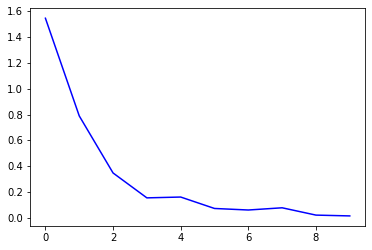

In [30]:
plt.plot(history2.history["loss"],'b')
modelo2.evaluate(np.array(X_train), Ytrain)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[25  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


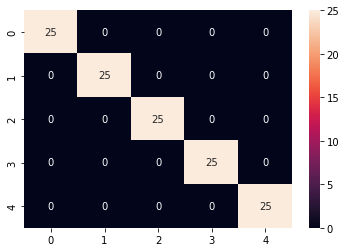

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo2.predict(np.array(X_train))

y_test_class = np.argmax(Ytrain,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.40      0.40      0.40         5
           2       1.00      0.60      0.75         5
           3       0.50      0.40      0.44         5
           4       0.67      0.80      0.73         5

    accuracy                           0.60        25
   macro avg       0.63      0.60      0.60        25
weighted avg       0.63      0.60      0.60        25

[[4 0 0 1 0]
 [1 2 0 1 1]
 [0 2 3 0 0]
 [2 0 0 2 1]
 [0 1 0 0 4]]


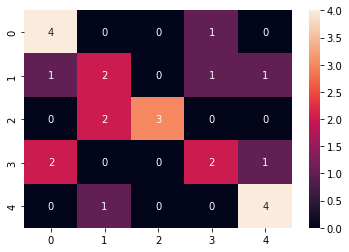

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo2.predict(np.array(X_test))

y_test_class = np.argmax(Ytest,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [33]:
modelo2.evaluate(X_test, Ytest)

1/1 [==============================] - 0s 208ms/step - loss: 2.7649 - accuracy: 0.6000


[2.7649381160736084, 0.6000000238418579]

Como podemos observar para este segundo modelo se obtuvo un accuracy del 60% el cual es mas bajo por lo cual podemos inferir que aumentar las capas en la arquitectura puede producir sobregeneralizacion en los datos lo que conyeva a mala clasificacion en los datos de validacion

##**CONCLUSIONES**

* la convolucion 2D es util para procesar datos que manejan 2 dimensiones en este caso los datos de un espectograma el cual nos ayuda a trabajar con sonidos a travez de una imagen de su espectro de frecuencia.

* No siempre es necesario un modelo complejo para obtener mejores resultados, ya que se puede sobreentrenar un modelo y tiende a no generalizar los datos

* Para mejorar este entrenamiento se puede ampliar el dataset y asi obtener mejore resultados.

##MODELO Adiional para pruebas

In [62]:
inputs = LK.Input(shape=(249,129,1))
conv1 = LK.Conv2D(10, (3,3),padding='valid',activation='relu')(inputs)
conv2 = LK.Conv2D(5, (3,3),padding='valid',activation='relu')(conv1)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool1)
FC1 = LK.Dense(100,activation='relu')(flat)
FC2 = LK.Dense(50,activation='relu')(FC1)
outputs = LK.Dense(5,activation='softmax')(FC2)
modelo3 = MK.Model(inputs, outputs)


In [63]:

modelo3.compile(optimizer="adam",loss="categorical_crossentropy" ,metrics=['accuracy'])

In [64]:
history3=modelo3.fit (X_train, Ytrain, epochs=10, verbose = 1)

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 1.3901 - accuracy: 0.3840
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 0.5758 - accuracy: 0.8560
Epoch 3/10
4/4 [==============================] - 3s 896ms/step - loss: 0.2089 - accuracy: 0.9600
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.0679 - accuracy: 0.9920
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.0283 - accuracy: 0.9920
Epoch 6/10
4/4 [==============================] - 4s 841ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 3s 771ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 3s 781ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 3s 770ms/step - loss: 5.9299e-04 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 3s 751ms/step - loss: 3.5949e-04 - accuracy: 1.0000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[25  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


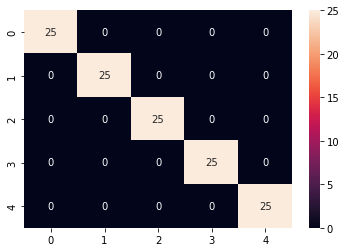

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo3.predict(X_train)

y_test_class = np.argmax(Ytrain,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.57      0.80      0.67         5
           2       1.00      0.60      0.75         5
           3       0.75      0.60      0.67         5
           4       0.80      0.80      0.80         5

    accuracy                           0.72        25
   macro avg       0.76      0.72      0.72        25
weighted avg       0.76      0.72      0.72        25

[[4 0 0 1 0]
 [1 4 0 0 0]
 [0 2 3 0 0]
 [1 0 0 3 1]
 [0 1 0 0 4]]


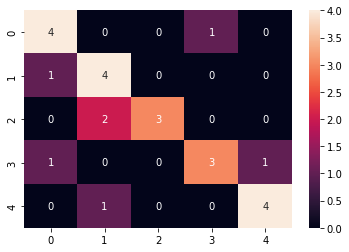

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo3.predict(X_test)

y_test_class = np.argmax(Ytest,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [67]:
modelo3.evaluate(X_test, Ytest)

1/1 [==============================] - 1s 607ms/step - loss: 2.3926 - accuracy: 0.7200


[2.3926234245300293, 0.7200000286102295]